### Project: Smart Device Usage Analysis for Bellabeat

Bellabeat aims to become a larger player in the smart wellness technology market. As a junior data analyst on the marketing team, my task is to analyze smart device usage trends using public Fitbit data. By identifying common habits and preferences in how users engage with health-tracking devices, I will provide actionable marketing insights. These insights will be applied to one Bellabeat product to help refine and optimize Bellabeat’s overall marketing strategy.

This analysis uses the publicly available Fitbit Fitness Tracker Dataset hosted on Kaggle. It contains minute and daily-level data from 30 Fitbit users, including activity, heart rate, sleep, and step counts. While the dataset is well-structured and offers detailed behavioral data, it is limited by sample size and timeframe (2016). The data is in both wide and long formats depending on the file and is shared under a CC0 Public Domain license, making it suitable for public analysis and portfolio use.

In [1]:
import pandas as pd
import os

# Load the key uploaded CSV files
activity_df = pd.read_csv("dailyActivity_merged.csv")
sleep_df = pd.read_csv("minuteSleep_merged.csv")
heart_df = pd.read_csv("heartrate_seconds_merged.csv")
weight_df = pd.read_csv("weightLogInfo_merged.csv")
steps_df = pd.read_csv("minuteStepsNarrow_merged.csv")
mets_df = pd.read_csv("minuteMETsNarrow_merged.csv")

In [3]:
# Load the remaining CSVs
hourly_cal_df = pd.read_csv("hourlyCalories_merged.csv")
hourly_int_df = pd.read_csv("hourlyIntensities_merged.csv")
hourly_steps_df = pd.read_csv("hourlySteps_merged.csv")
minute_cal_df = pd.read_csv("minuteCaloriesNarrow_merged.csv")
minute_int_df = pd.read_csv("minuteIntensitiesNarrow_merged.csv")

In [4]:
# Basic overview and cleaning: remove duplicates
activity_df.drop_duplicates(inplace=True)
sleep_df.drop_duplicates(inplace=True)
heart_df.drop_duplicates(inplace=True)
weight_df.drop_duplicates(inplace=True)
steps_df.drop_duplicates(inplace=True)
mets_df.drop_duplicates(inplace=True)

In [5]:
# Remove duplicates
hourly_cal_df.drop_duplicates(inplace=True)
hourly_int_df.drop_duplicates(inplace=True)
hourly_steps_df.drop_duplicates(inplace=True)
minute_cal_df.drop_duplicates(inplace=True)
minute_int_df.drop_duplicates(inplace=True)

In [8]:
# Fix the datetime parsing for minuteSleep_merged.csv
sleep_df['date'] = pd.to_datetime(sleep_df['date'], format="%m/%d/%Y %I:%M:%S %p")

In [9]:
# Convert date/time columns
activity_df['ActivityDate'] = pd.to_datetime(activity_df['ActivityDate'], format="%m/%d/%Y")
sleep_df['date'] = pd.to_datetime(sleep_df['date'], format="%m/%d/%Y")
heart_df['Time'] = pd.to_datetime(heart_df['Time'], format="%m/%d/%Y %I:%M:%S %p")
steps_df['ActivityMinute'] = pd.to_datetime(steps_df['ActivityMinute'], format="%m/%d/%Y %I:%M:%S %p")
mets_df['ActivityMinute'] = pd.to_datetime(mets_df['ActivityMinute'], format="%m/%d/%Y %I:%M:%S %p")
weight_df['Date'] = pd.to_datetime(weight_df['Date'], format="%m/%d/%Y %I:%M:%S %p")

In [10]:
# Now re-check missing values and shape summaries
missing_data_summary = {
    "dailyActivity": activity_df.isnull().sum(),
    "minuteSleep": sleep_df.isnull().sum(),
    "heartrate_seconds": heart_df.isnull().sum(),
    "weightLog": weight_df.isnull().sum(),
    "minuteSteps": steps_df.isnull().sum(),
    "minuteMETs": mets_df.isnull().sum()
}

In [11]:
shapes_summary = {
    "dailyActivity": activity_df.shape,
    "minuteSleep": sleep_df.shape,
    "heartrate_seconds": heart_df.shape,
    "weightLog": weight_df.shape,
    "minuteSteps": steps_df.shape,
    "minuteMETs": mets_df.shape
}

In [12]:
missing_data_summary, shapes_summary

({'dailyActivity': Id                          0
  ActivityDate                0
  TotalSteps                  0
  TotalDistance               0
  TrackerDistance             0
  LoggedActivitiesDistance    0
  VeryActiveDistance          0
  ModeratelyActiveDistance    0
  LightActiveDistance         0
  SedentaryActiveDistance     0
  VeryActiveMinutes           0
  FairlyActiveMinutes         0
  LightlyActiveMinutes        0
  SedentaryMinutes            0
  Calories                    0
  dtype: int64,
  'minuteSleep': Id       0
  date     0
  value    0
  logId    0
  dtype: int64,
  'heartrate_seconds': Id       0
  Time     0
  Value    0
  dtype: int64,
  'weightLog': Id                 0
  Date               0
  WeightKg           0
  WeightPounds       0
  Fat               31
  BMI                0
  IsManualReport     0
  LogId              0
  dtype: int64,
  'minuteSteps': Id                0
  ActivityMinute    0
  Steps             0
  dtype: int64,
  'minuteMETs': Id

In [13]:
# Convert datetime columns
hourly_cal_df['ActivityHour'] = pd.to_datetime(hourly_cal_df['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
hourly_int_df['ActivityHour'] = pd.to_datetime(hourly_int_df['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
hourly_steps_df['ActivityHour'] = pd.to_datetime(hourly_steps_df['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
minute_cal_df['ActivityMinute'] = pd.to_datetime(minute_cal_df['ActivityMinute'], format="%m/%d/%Y %I:%M:%S %p")
minute_int_df['ActivityMinute'] = pd.to_datetime(minute_int_df['ActivityMinute'], format="%m/%d/%Y %I:%M:%S %p")

In [14]:
# Check for missing values
more_missing_data_summary = {
    "hourlyCalories": hourly_cal_df.isnull().sum(),
    "hourlyIntensities": hourly_int_df.isnull().sum(),
    "hourlySteps": hourly_steps_df.isnull().sum(),
    "minuteCalories": minute_cal_df.isnull().sum(),
    "minuteIntensities": minute_int_df.isnull().sum()
}

In [15]:
# Get shapes
more_shapes_summary = {
    "hourlyCalories": hourly_cal_df.shape,
    "hourlyIntensities": hourly_int_df.shape,
    "hourlySteps": hourly_steps_df.shape,
    "minuteCalories": minute_cal_df.shape,
    "minuteIntensities": minute_int_df.shape
}

In [16]:
more_missing_data_summary, more_shapes_summary

({'hourlyCalories': Id              0
  ActivityHour    0
  Calories        0
  dtype: int64,
  'hourlyIntensities': Id                  0
  ActivityHour        0
  TotalIntensity      0
  AverageIntensity    0
  dtype: int64,
  'hourlySteps': Id              0
  ActivityHour    0
  StepTotal       0
  dtype: int64,
  'minuteCalories': Id                0
  ActivityMinute    0
  Calories          0
  dtype: int64,
  'minuteIntensities': Id                0
  ActivityMinute    0
  Intensity         0
  dtype: int64},
 {'hourlyCalories': (24084, 3),
  'hourlyIntensities': (24084, 4),
  'hourlySteps': (24084, 3),
  'minuteCalories': (1445040, 3),
  'minuteIntensities': (1445040, 3)})

I cleaned and transformed eleven core datasets from the Fitbit case study. Using Python, I removed duplicates, parsed all date and timestamp fields into standard formats, and confirmed that most datasets had no missing values. One exception was the weightLog dataset, where the Fat column had 31 missing entries. The data is now structured, validated, and ready for exploration in the Analyze phase.

In [17]:
# Calculate correlation between steps and calories
correlation_steps_calories = activity_df['TotalSteps'].corr(activity_df['Calories'])

In [18]:
# Summary statistics for activity and sedentary behavior
activity_summary = activity_df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].describe()

In [19]:
# Check distribution of TotalSteps and Calories
steps_distribution = activity_df['TotalSteps'].describe()
calories_distribution = activity_df['Calories'].describe()

In [20]:
# Proportion of records with zero LoggedActivitiesDistance
zero_logged_activities_pct = (activity_df['LoggedActivitiesDistance'] == 0).mean() * 100

In [21]:
correlation_steps_calories, activity_summary, steps_distribution, calories_distribution, zero_logged_activities_pct

(0.5813801894994014,
        VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes  \
 count         457.000000           457.000000            457.000000   
 mean           16.623632            13.070022            170.070022   
 std            28.919704            36.208635            122.205372   
 min             0.000000             0.000000              0.000000   
 25%             0.000000             0.000000             64.000000   
 50%             0.000000             1.000000            181.000000   
 75%            25.000000            16.000000            257.000000   
 max           202.000000           660.000000            720.000000   
 
        SedentaryMinutes  
 count        457.000000  
 mean         995.282276  
 std          337.021404  
 min           32.000000  
 25%          728.000000  
 50%         1057.000000  
 75%         1285.000000  
 max         1440.000000  ,
 count      457.000000
 mean      6546.562363
 std       5398.493064
 min          0.

I examined daily activity, step count, calorie burn, and sedentary behavior patterns from the cleaned Fitbit dataset. Users averaged 6,546 steps and burned around 2,189 calories per day, but also spent nearly 1,000 minutes being sedentary, with very limited time spent in high-intensity movement. A moderate positive correlation (r = 0.58) between step count and calories burned revealed that even low-to-moderate activity levels had a measurable impact on energy expenditure. Additionally, most users did not log workouts manually, reinforcing a preference for passive, automatic tracking. These findings suggest that Bellabeat should position its products as effortless, holistic wellness tools tailored for real lifestyles—not just for fitness enthusiasts. Marketing strategies can be more effective by focusing on features that support gentle movement, lifestyle balance, and stress recovery, rather than promoting performance-focused goals.

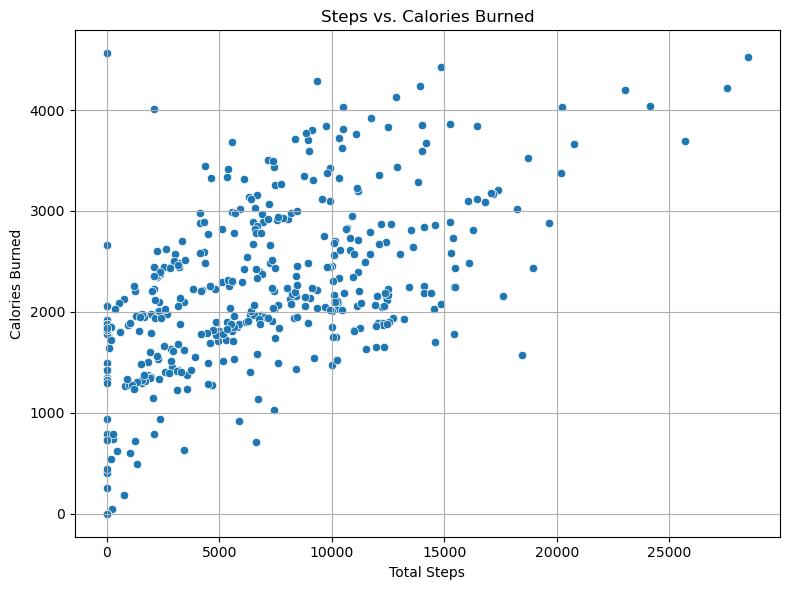

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv("dailyActivity_merged.csv")
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format="%m/%d/%Y")

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['TotalSteps'], y=df['Calories'])
plt.title("Steps vs. Calories Burned")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.tight_layout()
plt.show()

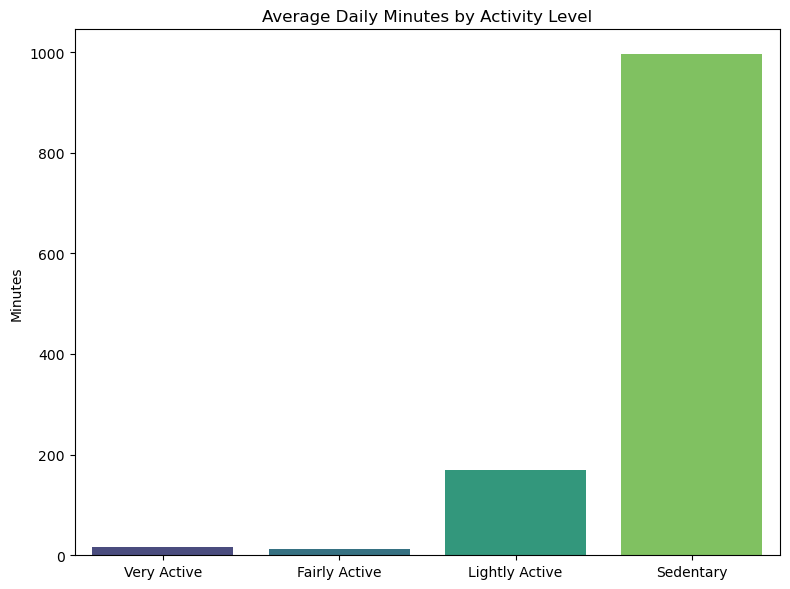

In [23]:
# Calculate average minutes per activity category
avg_minutes = {
    'Very Active': df['VeryActiveMinutes'].mean(),
    'Fairly Active': df['FairlyActiveMinutes'].mean(),
    'Lightly Active': df['LightlyActiveMinutes'].mean(),
    'Sedentary': df['SedentaryMinutes'].mean()
}

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(avg_minutes.keys()), y=list(avg_minutes.values()), palette='viridis')
plt.title("Average Daily Minutes by Activity Level")
plt.ylabel("Minutes")
plt.tight_layout()
plt.show()

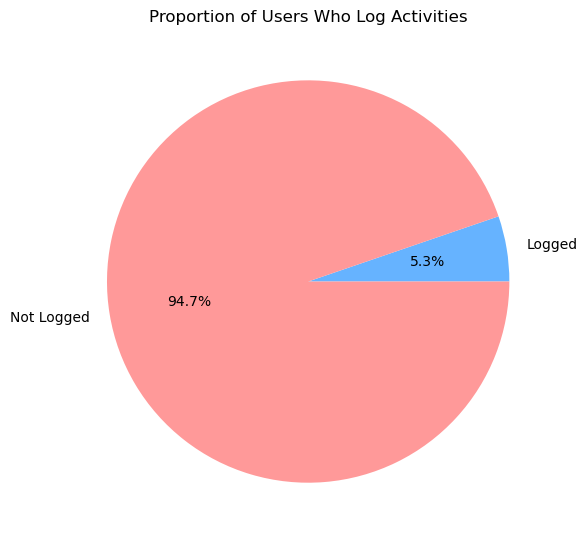

In [24]:
# Count how many users logged activities
logged = (df['LoggedActivitiesDistance'] > 0).sum()
not_logged = (df['LoggedActivitiesDistance'] == 0).sum()

# Plot
plt.figure(figsize=(6, 6))
plt.pie([logged, not_logged], labels=["Logged", "Not Logged"], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Proportion of Users Who Log Activities")
plt.tight_layout()
plt.show()

To clearly communicate my findings, I created visualizations that highlight key user behavior trends. A scatter plot of total steps versus calories burned showed a moderate positive relationship, confirming that increased daily movement leads to higher energy expenditure—even at low to moderate intensity levels. A bar chart comparing average daily minutes across activity levels revealed that users are overwhelmingly sedentary, with only a small fraction of their day spent in very active movement. Additionally, a pie chart showed that most users did not manually log any activities, indicating a strong preference for passive tracking. These visualizations were designed to support Bellabeat’s marketing team in understanding user behavior patterns and identifying areas of opportunity. I used clear labels, contrast, and concise annotations to ensure the visuals were intuitive and stakeholder-friendly.

Based on the analysis, I developed three high-level recommendations to help Bellabeat enhance its marketing strategy and product positioning. First, Bellabeat should emphasize its passive tracking capabilities—users clearly prefer automated data collection over manual logging, so promoting the ease and convenience of Bellabeat’s smart devices can attract engagement. Second, the data shows that most users engage primarily in light movement and spend a large portion of their day sedentary. This highlights an opportunity to reframe Bellabeat as a holistic wellness companion rather than a performance tracker, targeting users interested in lifestyle improvements like stress reduction, light activity, and sleep. Lastly, Bellabeat should leverage these insights to craft gentle, motivational messaging that empowers users to make small but impactful changes to their daily habits. By aligning its marketing with real user behaviors, Bellabeat can better connect with its audience and differentiate itself in the wellness technology space.